# Introduction to Dynamic Programming: Homework

## Problem 1: Cake-eating Problem

Start with the infinitely-lived cake-eating problem. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. Solve for the value function and plot it.
1. Plot the consumption path.
1. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.



## Answers: 

1. The state variable is the amount of cake remaining : $x$

2. The sequence problem (SP) is given by: 
$$
V^*(x_0) \equiv \max_{\{c_{t}\}_{t=0}^{\infty}} \sum_{t=0}^{\infty} \beta^t ln(c_t) \quad s.t. \quad x_{t+1} = x_t - c_t \quad \forall t \geq 0, \quad \text{given} \quad x_0 = 1
$$

The recursive formulation of the problem is given by: 
$$
V(x) = \sup_{c \in [0,x]} [ ln(c) + \beta V(x') ] \quad s.t. \quad x' = x - c
$$

Substituting the law of motion yields the Functional/Bellman Equation (FE): 
$$
V(x) = \sup_{c \in [0,x]} [ln(c) + \beta V(x-c)]
$$

Note that the flow utility is unbounded below (even if the domain is restricted to $(0,1]$)  With unbounded returns, solutions to the functional equation may have solutions other than the supremum function of (SP) $V^*$ (see S-L Section 4.4). We thus need to find a function $\hat{V}$ that is an upper bound for $V^*$, and use $\hat{V}$ as the initial value function for VFI. 

By the law of motion and with $c \geq 0$, 
\begin{align*}
& x_{t+1} \leq x_{t} \quad\Longrightarrow\quad ln(x_{t+1}) \leq ln(x_{t}) \quad\Longrightarrow\quad ln(x_{t}) \leq ln(x_0) \quad\forall t \geq 0 \\~\\
& \therefore ln(x_t-x_{t+1}) \leq ln(x_t) \leq ln(x_0) \quad \forall t \geq 0 \\~\\
& \therefore \sum_{t=0}^{\infty} \beta^t ln(x_t-x_{t+1}) \leq \frac{ln(x_0)}{1-\beta} \quad\forall \{ x_t \} \in \Pi(x_0) \quad\forall x_0 \\~\\
& \therefore V^*(x_0) \leq \frac{ln(x_0)}{1-\beta} \equiv \hat{V}(x_0) \quad\forall x_0
\end{align*}


3 & 4. Solve for value function. Plot the value function and consumption path: 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages and class
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import time
from cakeEating import CakeEatingGS, CakeEatingGS_FH

Converged in 2087 iterations. Elapsed time is 2.29 seconds.


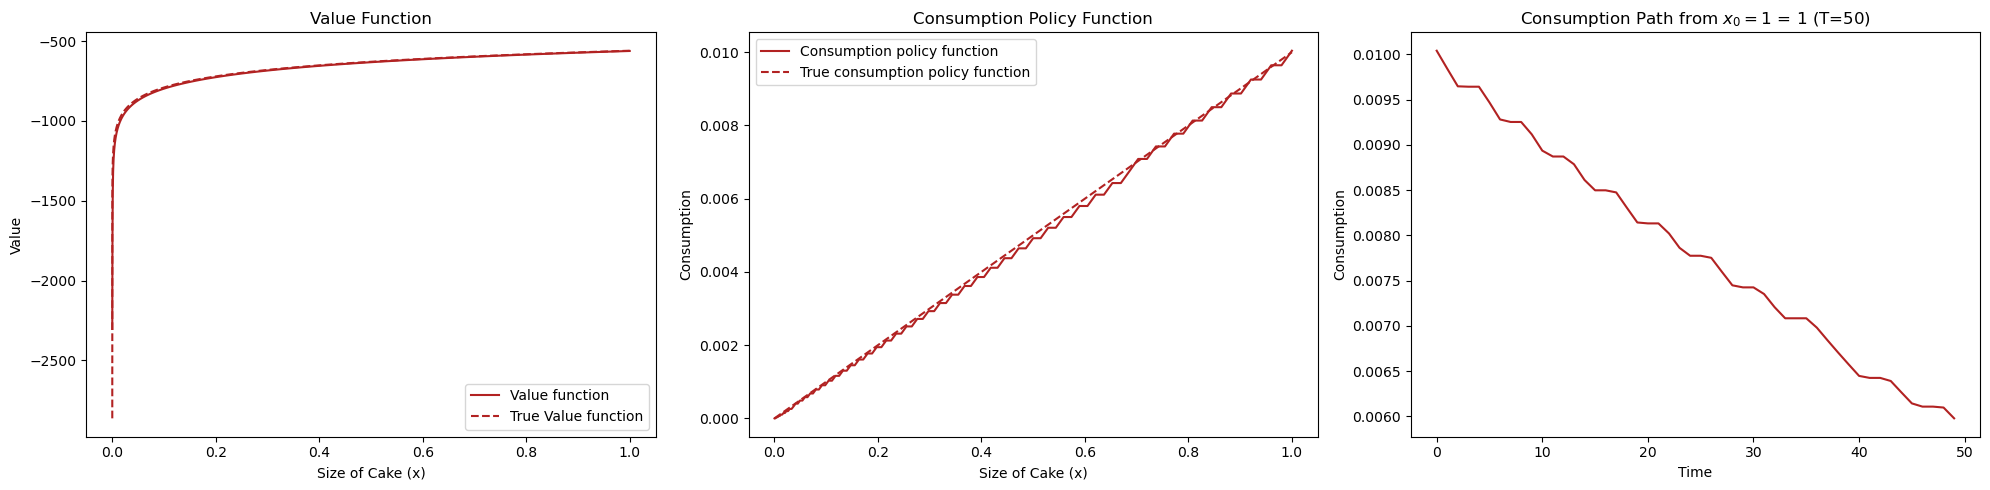

In [3]:
# Instantiate class with default parameters: 
'''
# Default structural parameters: 
beta = 0.99, # Discount factor
delta = 0, # Depcreciation rate
xmin = 1e-10, # Minimum value of asset grid
xmax = 1, # Maximum value of asset grid

# Default simulation parameters: 
max_iter = 5000,
tolerance = 1e-10, 
grid_size_x = 100, 
grid_size_c = 500, 
xgrid_curvature = 2, 
cgrid_curvature = 2: 
'''
ce = CakeEatingGS()

# Simulate model
ce.solve_model()

x = ce.x

v_true = ce.v_true
c_true = ce.c_true

v_gs = ce.v
c_gs = ce.c_policy
savings_gs = ce.savings_policy

c_path, _ = ce.solve_path()

## Plots
plt.figure(figsize=(20, 5))

# Plot value function 
plt.subplot(1,3,1)
plt.plot(x, v_gs, label='Value function', color=(178/255,34/255,34/255), linestyle='-')
plt.plot(x, v_true, label='True Value function', color=(178/255,34/255,34/255), linestyle='--')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Value')
plt.legend()
plt.title('Value Function')

# Plot consumption policy function
plt.subplot(1,3,2)
plt.plot(x, c_gs, label='Consumption policy function', color=(178/255,34/255,34/255), linestyle='-')
plt.plot(x, c_true, label='True consumption policy function', color=(178/255,34/255,34/255), linestyle='--')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title('Consumption Policy Function')

# Plot consumption path for T=50 at x0=1
plt.subplot(1,3,3)
plt.plot(range(50), c_path[:,-1], color=(178/255,34/255,34/255), linestyle='-')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title(f'Consumption Path from $x_0 = 1$ = 1 (T=50)')

plt.tight_layout()
plt.show()



***

5. Plot the consumption path for $\beta=0.9$ and $\beta=0.9999$. How and why are they different from your original solution?

The lower the discount factor, the less weight the household puts in future consumption. Thus, the household with lower discount factor front-loads consumption today, while the household with high discount factor decides to consume less today to allocate more consumption in the future. Note that total consumption are the same across households ($=x_0=1$), meaning that the area under the consumption path from $t=0$ to $\infty$ are all equal. 

beta = 0.9
Converged in 207 iterations. Elapsed time is 0.19 seconds.
------------
beta = 0.99
Converged in 2087 iterations. Elapsed time is 1.67 seconds.
------------
beta = 0.9999
Converged in 152759 iterations. Elapsed time is 133.69 seconds.
------------


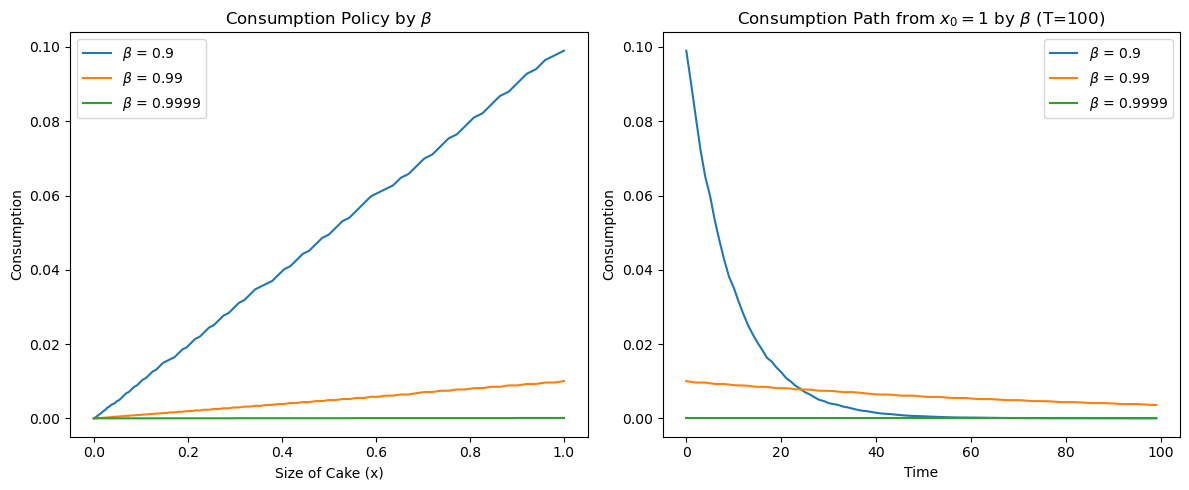

In [4]:
# Initialize dictionaries to store results
x_vec = {}
v_vec = {}
c_gs_vec = {}
v_true_vec = {}
c_true_vec = {}
c_path_vec = {}
beta_vec = [0.9, 0.99, 0.9999]

for i, b in enumerate(beta_vec, start=1):

    # Initialize the model with beta = b
    ce = CakeEatingGS(beta=b, max_iter=500000)
    
    print(f'beta = {b}')
    # Simulate the model
    ce.solve_model()
    print(f'------------')

    # Store the results in the respective dictionaries
    x_vec[f"x_{i}"] = ce.x
    v_vec[f"v_{i}"] = ce.v
    c_gs_vec[f"c_gs_{i}"] = ce.c_policy
    v_true_vec[f"v_true_{i}"] = ce.v_true
    c_true_vec[f"c_true_{i}"] = ce.c_true
    c_path_vec[f"c_path_{i}"], _ = ce.solve_path(horizon=100)


# Plot consumption policy
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
for i, beta in enumerate(beta_vec, start=1):
    plt.plot(x_vec[f"x_{i}"], c_gs_vec[f"c_gs_{i}"], label=f'$\\beta$ = {beta}')
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Policy by $\\beta$')
plt.legend()

# Plot consumption path
plt.subplot(1,2,2)
for i, beta in enumerate(beta_vec, start=1):
    plt.plot(range(100), c_path_vec[f"c_path_{i}"][:,-1], label=f'$\\beta$ = {beta}')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Path from $x_0 = 1$ by $\\beta$ (T=100)')
plt.legend()

plt.tight_layout()
plt.show()

***
Suppose the cake depreciates at rate $\delta$. That is the law of motion for each cake is $x' = (1-\delta)x - c$. 
1. Solve the problem and plot the consumption path with $\delta=0$ and $\delta=0.1$. Explain why these consumption paths are different.

Note: Setting a high depreciation rate (ex. $\delta=0.1$) does not lead to convergence to the true value. Therefore, we set $\delta=0.025$ and compare the case with that of no depreciation. 

Depreciation of cake reduces the resources available to the household every period. This reduces overall consumption compared to that under no depreciation. Moreover, depreciation of cake reduces the resources available to the household at subsequent periods. This decreases the marginal benefit of saving a unit of consumption today for future consumption. The household front-loads consumption through this inter-temporal channel. 

delta = 0
Converged in 2246 iterations. Elapsed time is 375.11 seconds.
------------
delta = 0.025
Converged in 1927 iterations. Elapsed time is 303.23 seconds.
------------


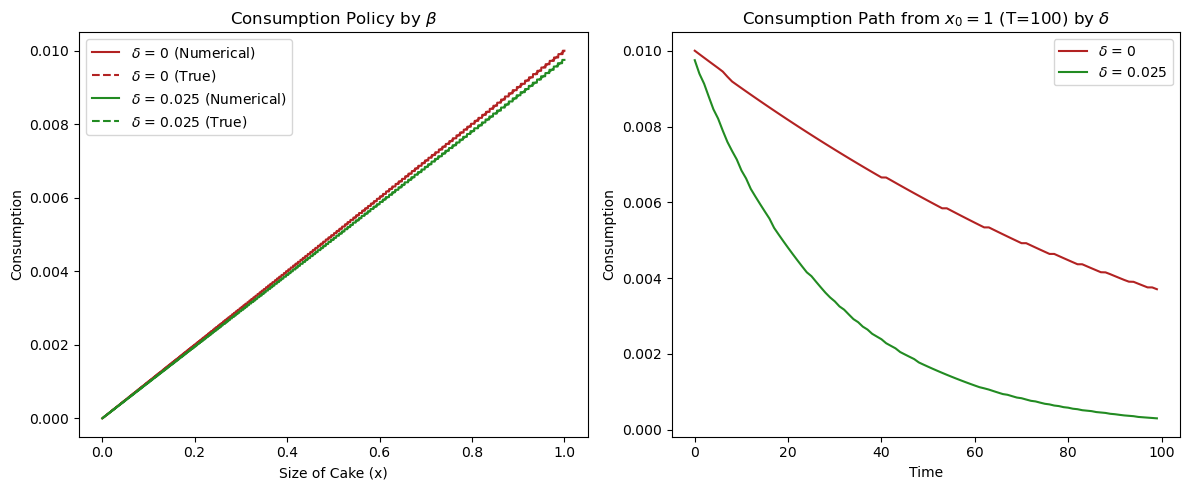

In [5]:
# Initialize dictionaries to store results
x_vec = {}
v_vec = {}
c_gs_vec = {}
v_true_vec = {}
c_true_vec = {}
c_path_vec = {}
delta_vec = [0, 0.025]

for i, d in enumerate(delta_vec, start=1):

    # Initialize the model with beta = b
    ce = CakeEatingGS(delta=d, grid_size_x=4000, grid_size_c=1500, cgrid_curvature=3)
    
    print(f'delta = {d}')
    # Simulate the model
    ce.solve_model()
    print(f'------------')
    # Store the results in the respective dictionaries
    x_vec[f"x_{i}"] = ce.x
    v_vec[f"v_{i}"] = ce.v
    c_gs_vec[f"c_gs_{i}"] = ce.c_policy
    v_true_vec[f"v_true_{i}"] = ce.v_true
    c_true_vec[f"c_true_{i}"] = ce.c_true
    c_path_vec[f"c_path_{i}"], _ = ce.solve_path(horizon=100)


# Plot consumption policy with true consumption policy (both same color one solid and one dashed line) for each delta with different color
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(x_vec["x_1"], c_gs_vec["c_gs_1"], label=f'$\\delta$ = 0 (Numerical)', color=(178/255,34/255,34/255))
plt.plot(x_vec["x_1"], c_true_vec["c_true_1"], label=f'$\\delta$ = 0 (True)', linestyle='--', color=(178/255,34/255,34/255))
plt.plot(x_vec["x_2"], c_gs_vec["c_gs_2"], label=f'$\\delta$ = 0.025 (Numerical)', color=(34/255,139/255,34/255))
plt.plot(x_vec["x_2"], c_true_vec["c_true_2"], label=f'$\\delta$ = 0.025 (True)', linestyle='--', color=(34/255,139/255,34/255))
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Policy by $\\beta$')
plt.legend()

# Plot consumption path
plt.subplot(1,2,2)
plt.plot(range(100), c_path_vec["c_path_1"][:,-1], label=f'$\\delta$ = 0', color=(178/255,34/255,34/255))
plt.plot(range(100), c_path_vec["c_path_2"][:,-1], label=f'$\\delta$ = 0.025', color=(34/255,139/255,34/255))
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Path from $x_0 = 1$ (T=100) by $\\delta$')
plt.legend()

plt.tight_layout()
plt.show()


***

## Problem 2: Finite-horizon Cake-eating Problem

The household lives for $T$ periods. The per-period utility function is $u(c) = ln(c)$ and the discount rate is $\beta=0.99$. The cake is of initial size $x_0 = 1$. The law of motion for the cake is $x' = x- c$.
1. What is the state variable of the problem?
1. Set up the Bellman Equation.
1. What does the Bellman Equation look like in period $T$?
1. Let $T=50$ and solve backwards. Then solve for $T=500$.
1. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.


## Answers: 

1. The state variable is the amount of cake remaining and the number of periods remaining until T: ($x$, $n$)

2. The sequence problem (SP) of the finite-horizon cake-eating problem is given by: 
$$
V(x_0) \equiv \max_{\{c_{t}\}_{t=0}^{T-1}} \sum_{t=0}^{T-1} \beta^t ln(c_t) \quad s.t. \quad x_{t+1} = x_t - c_t \quad \forall 0 \leq t \leq T-1, \quad \text{given} \quad x_0 = 1
$$

Denoting n as the number of periods remaining until T, the Bellman Equation can be formulated as: 
$$
V(x,n) \equiv 0 \quad \text{if} \quad n = 0 \\
V(x,n) \equiv \sup_{c \in [0,x]} [ln(c) + \beta V(x-c,n-1)] \quad\forall n\leq1
$$

3. At period T-1, the household eats all the remaining cake and saves none for T, as she gains no utility from consumption at T. For consistency, we define the Bellman equation at period T to be defined as V(x,0) = 0. 

4 & 5. Let T=50 and solve backwards. Then solve for T=500. Plot the two consumption paths and compare them to your answer in problem 1. How are they different and why?

Note: We can solve this specific finite-horizon problem by using the algorithm to solve the infinite-horizon problem. First, consider "max_simul" in the CakeEatingGS class as the time horizon $T$. The iterations, starting from 0 to "max_simul - 1", represent the number of periods remaining until $T-1$. In other words, at iteration = $0$, we have $t=T-1$ and at iteration = $T-1$, we have $t=0$. Second, set the initial value function $v0=0$, which represents the value at $t=T$. At iteration = $0$ ($t=T-1$), the continuation value (the value at time horizon $T$) is zero. Therefore, iterating this process until "max_simul" (not until convergence) is essentially solving the finite-horizon problem backwards. To track the consumption path over time, we just need to save the consumption policy function for each iteration. This procedure is embedded in CakeEatingGS_FH class that is used to solve the finite-horizon problem. 

The consumption policy function under finite horizon converges to that under infinite horizon as the time horizon increases. The longer the time horizon, the household needs to allocate the cake more to future consumption. Hence, for a given cake size, consumption is lower for longer time horizon. 

Converged in 1982 iterations. Elapsed time is 23.42 seconds.
Elapsed time is 0.61 seconds.
Elapsed time is 5.64 seconds.


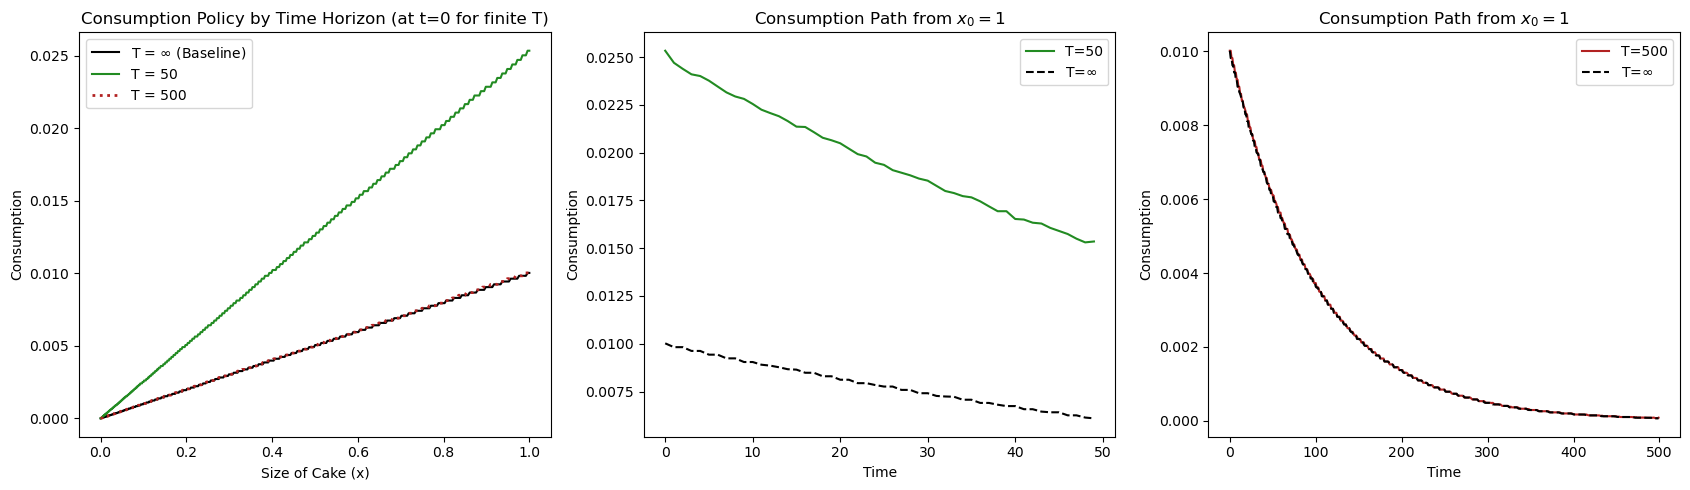

In [6]:
# Baseline (Infinite-horizon)
ce = CakeEatingGS(grid_size_x = 500, grid_size_c=1000)
ce.solve_model()
x = ce.x
c_IH = ce.c_policy
cpath_IH50, _ = ce.solve_path(horizon=50)
cpath_IH500, _ = ce.solve_path(horizon=500)

# Finite-horizon T=50 
ceFH_T50 = CakeEatingGS_FH(horizon=50, grid_size_x = 500, grid_size_c=1000) 
ceFH_T50.solve_model()
cpath_T50, _, _ = ceFH_T50.solve_path()
c_T50 = cpath_T50[0,:] # Policy at t=0

# Finite-horizon T=500 
ceFH_T500 = CakeEatingGS_FH(horizon=500, grid_size_x = 500, grid_size_c=1000) 
ceFH_T500.solve_model()
cpath_T500, _, _ = ceFH_T500.solve_path()
c_T500 = cpath_T500[0,:] # Policy at t=0

# Plot consumption policy function
plt.figure(figsize=(17, 5))

plt.subplot(1,3,1)
plt.plot(x, c_IH, label=f'T = $\\infty$ (Baseline)', color='black')
plt.plot(x, c_T50, label=f'T = 50', color=(34/255,139/255,34/255))
plt.plot(x, c_T500, label=f'T = 500', linestyle=':', linewidth=2, color=(178/255,34/255,34/255))
plt.xlabel('Size of Cake (x)')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Policy by Time Horizon (at t=0 for finite T)')

# Plot consumption path over time
plt.subplot(1,3,2)
plt.plot(range(50), cpath_T50[:,-1], label='T=50', color=(34/255,139/255,34/255), linestyle='-')
plt.plot(range(50), cpath_IH50[:,-1], label='T=$\infty$', color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Path from $x_0 = 1$')

plt.subplot(1,3,3)
plt.plot(range(500), cpath_T500[:,-1], label='T=500', color=(178/255,34/255,34/255), linestyle='-')
plt.plot(range(500), cpath_IH500[:,-1], label='T=$\infty$', color='black', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.title(f'Consumption Path from $x_0 = 1$')

plt.tight_layout()
plt.show()

***
## Problem 3: FOC from Bellman

1. Derive the FOC for the consumption-savings problem in lecture.
1. How is the FOC related to the Euler Equation?
1. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.
1. Explain why they are different. Which one would you prefer?

Bonus: write your code using functions. \
Bonus bonus: write your code using an object.

## Answers: 

The Bellman Equation of the consmption-savings problem is given by: 
$$
V(a) = \sup_{c(a) \in [0, (1+r)a + y ]} [ u(c(a)) + \beta V(((1+r)a + y - c(a)))]
$$

1. FOC w.r.t $c(a)$ yields: 
$$
\frac{\partial u(c(a))}{\partial c(a)} = \beta \frac{\partial V((1+r)a + y - c(a))}{\partial a'(a)}
$$
The FOC condition implies that the marginal utility of consumption today is equal to the discounted marginal valuation obtained from saving today's consumption. 

2. By the Envelope Theorem, we have $\frac{\partial V(a')}{\partial a'} = (1+r) \frac{\partial u(c')}{\partial c'}$, where $c' = c(a'(a)) = c((1+r)a + y - c(a))$, leading to the Euler Equation as below : 
$$
\frac{\partial u(c(a))}{\partial c(a)} = \beta (1+r) \frac{\partial u(c((1+r)a + y - c(a)))}{\partial c'}
$$
Under log utility, we have: 
$$
\begin{align*}
& \frac{1}{c(a)} = \beta (1+r) \frac{1}{c((1+r)a + y - c(a))}
\end{align*}
$$

3. Compute optimal consumption using that FOC and compare it to the consumption path we got in class.

In 3.2., we use the following equations to compute optimal consumption: 
$$
\begin{align}
c = \frac{c'}{\beta (1+r)} \\~\notag\\
a = \frac{a'+c-y}{1+r} 
\end{align}
$$

3.1. Consumption path we got in class

In [7]:
## VFI Grid Search Method

# Simulation parameters
max_iter = 2000
tolerance = 1e-5
iteration = 0

# Structural parameters
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 0
amax = 1
grid_size = 1000

# Define asset grid
a = np.linspace(amin, amax, grid_size)

# Initial guess for the value function
v0 = np.linspace(1, 10, grid_size)

# Define utility function --- makes it easy to change later
def utility(c):
    return np.log(c)

# consumption and a' grid
c_candidates = y + np.linspace(-0.5, 0.5, grid_size)
a_prime_candidates = (1+r)*a[np.newaxis, :] + y - c_candidates[:, np.newaxis] 


# Simulation
v_old = v0 
start = time.time()
for iteration in range(max_iter):

    f_interp = interp1d(a, v_old, kind='linear', bounds_error=False, fill_value=(-10000, 0))
    v_prime_candidates = f_interp(a_prime_candidates)

    # Calculate utility for all possible consumption choices
    utility_values = utility(c_candidates[:, np.newaxis]) + beta * v_prime_candidates

    # Find the consumption choice that maximizes utility
    c_index = np.argmax(utility_values, axis=0) 
    c = c_candidates[c_index]
    v_new = np.max(utility_values, axis=0)

    # Check convergence
    if np.max(np.abs(v_old-v_new))<tolerance:
        vfi_time = time.time()-start
        print(f'Converged in {iteration} iterations. Elapsed time is {vfi_time:.2f} seconds.')
        break
    
    v_old = v_new

else: 
    print('Model did not converge')

c_vfi = c


Converged in 906 iterations. Elapsed time is 20.69 seconds.


3.2. Consumption path using Euler Equation

In [8]:
## Method using Euler Equation

# Simulation parameters
max_iter = 10000
tolerance = 1e-5
iteration = 0

# Structural parameters
beta = 0.99
r = (1/beta) - 1
y = 1
amin = 1e-10
amax = 1
grid_size = 1000

# Define tomorrow's asset grid
aprime_grid = np.linspace(amin, amax, grid_size)

# Intial guess for tomorrow's consumption
cprime0 = y + np.linspace(-0.5, 0.5, grid_size)

# Simulation
cprime = cprime0 
start = time.time()
for iteration in range(max_iter):

    # Today's consumption
    c = cprime / (beta*(1+r))

    # Today's asset
    a = (aprime_grid + c - y)/(1+r)

    # Interpolate : bound consumption within feasible set
    f_interp = interp1d(a, c, kind='linear', bounds_error=False, fill_value='extrapolate')
    cprime_new = f_interp(aprime_grid)

    # Check convergence
    if np.max(np.abs(cprime-cprime_new))<tolerance:
        EE_time = time.time()-start
        print(f'Converged in {iteration} iterations. Elapsed time is {EE_time:.2f} seconds.')
        break

    cprime = cprime_new

else:
    print('Model did not converge')

c_foc = cprime_new


Converged in 192 iterations. Elapsed time is 0.04 seconds.


4. Explain why they are different. Which one would you prefer? 

Given the same level of tolerance for the value function and grid size, solving the consumption-savings problem using the Euler Equation is faster and gives a more accurate consumption policy function compared to the VFI. The former method is faster because it does not need to search for the maximizers as the optimal behavior of the household is already specified. It also gives higher accuracy of the consumption policy function because it interpolates over the consumption function. The former method is thus preferred. 

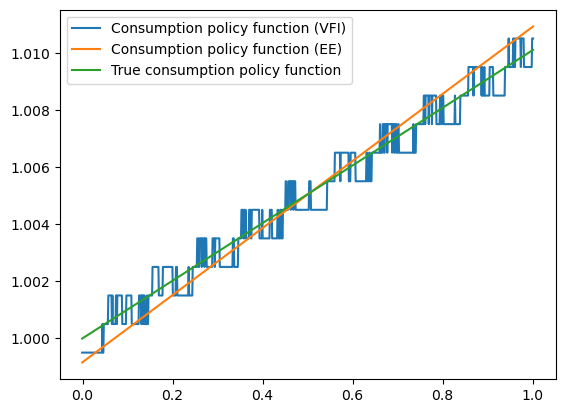

Error of VFI is 0.0003887328298307784. Elapsed time is 20.69 seconds.
Error of EE-method is 0.00022983075435618994. Elapsed time is 0.04 seconds.


In [9]:
# Compare computed policy functions with true value
plt.plot(a, c_vfi, label='Consumption policy function (VFI)')
plt.plot(a, c_foc, label='Consumption policy function (EE)')
plt.plot(a, y + r * a, label='True consumption policy function')
plt.legend()
plt.show()

# Calculate error
print(f'Error of VFI is {sum((y + r * a - c_vfi)**2)}. Elapsed time is {vfi_time:.2f} seconds.')
print(f'Error of EE-method is {sum((y + r * a - c_foc)**2)}. Elapsed time is {EE_time:.2f} seconds.')